In [1]:
import torch
from tools.read import get_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt

In [58]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("camembert-base")
model = AutoModelForSequenceClassification.from_pretrained("./2_camembert")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.weig

In [59]:
from transformers import pipeline

generator = pipeline(task="text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=False, )

In [60]:
df = get_data("data/dataset500.csv")
text = []
labels = []
for comments in df["comments"]:
    for comment in comments:
        text.append(comment["comment"][0])
        if(comment["grade"][0]< 10):
            labels.append(0)
        elif(comment["grade"][0]< 21):
            labels.append(1)
        # if(comment["grade"][0]< 5):
        #     labels.append(0)
        # elif(comment["grade"][0]< 10):
        #     labels.append(1)
        # elif(comment["grade"][0]< 15):
        #     labels.append(2)
        # elif(comment["grade"][0]< 21):
        #     labels.append(3)
        # labels.append(comment["grade"][0])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(text, labels, shuffle=True, random_state=42, test_size=0.33)

In [63]:
tokenizer_kwargs = {'padding':True,'truncation':True,'max_length':512}

In [64]:
y_pred_raw = generator(
X_test,
    **tokenizer_kwargs
)

In [65]:
y_pred = [int(x['label'].split('_')[1]) for x in y_pred_raw]

In [66]:
accuracy_score(y_test, y_pred)

0.6913716814159292

In [40]:
cm = confusion_matrix(y_test, y_pred)

In [41]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0-10','11-20'])

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (2).

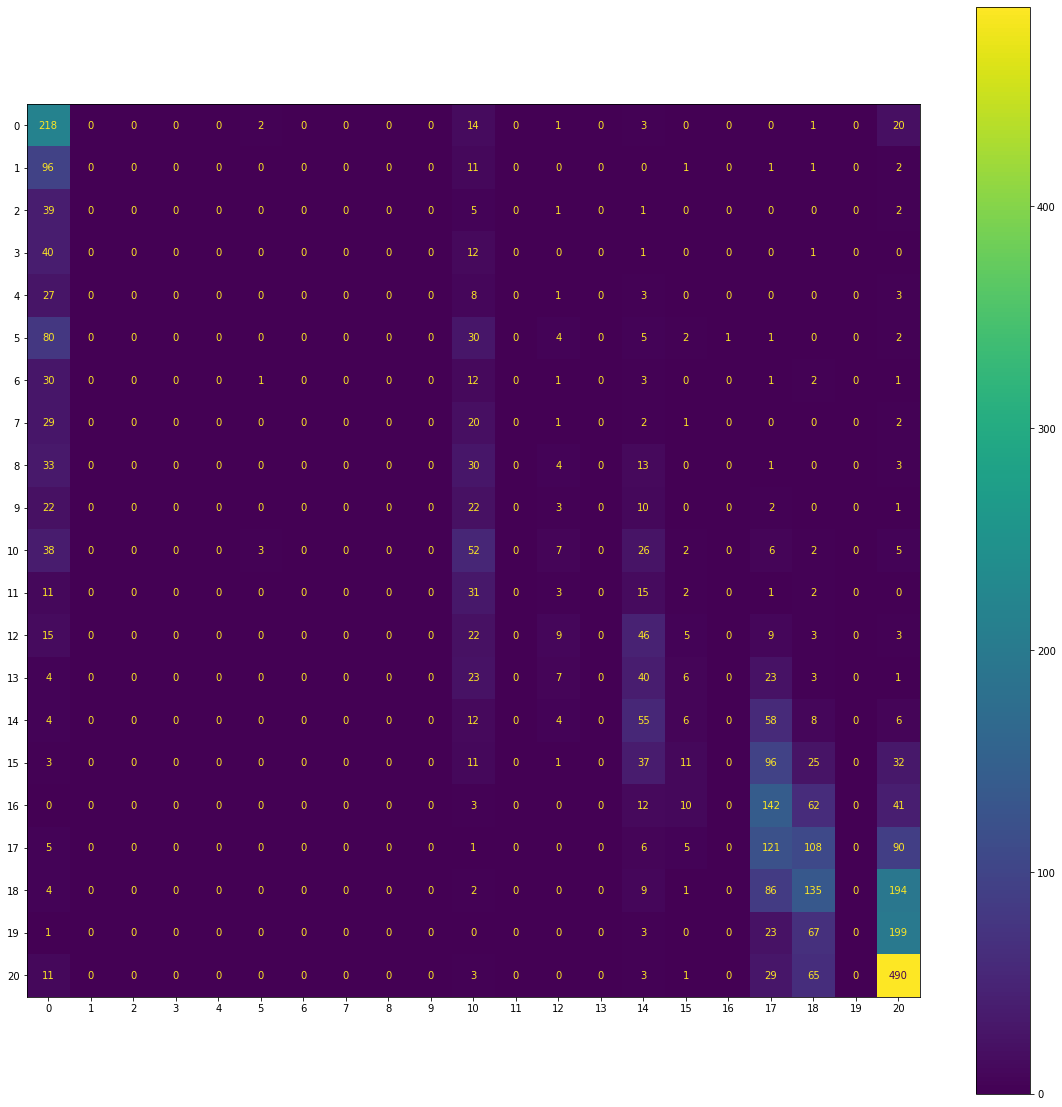

In [42]:

fig, ax = plt.subplots(figsize=(20, 20))
display.plot(ax=ax)

In [24]:
display.figure_.savefig("confusion_matrix.png")

In [15]:
import pandas as pd

In [43]:
result = pd.DataFrame({"text": X_test,"y_pred": y_pred, "y_true": y_test})


In [44]:
result.to_csv("data/21_CAMEMBERT.csv")